**1. What is Logistic Regression, and how does it differ from Linear Regression?**

* **Logistic Regression** predicts the probability of a binary outcome (0 or 1), whereas **Linear Regression** predicts a continuous value.
* In Logistic Regression, the linear score $z = \mathbf w^\top \mathbf x + b$ is passed through a sigmoid to produce a probability; Linear Regression uses $z$ directly.
* Logistic uses cross‐entropy loss; Linear uses squared‐error loss.

---

**2. What is the mathematical equation of Logistic Regression?**

* Compute the linear score:

  $$
    z = \mathbf w^\top \mathbf x + b.
  $$
* Convert to probability via the sigmoid:

  $$
    \hat p(\mathbf x) \;=\; \sigma(z) \;=\; \frac{1}{1 + e^{-z}}.
  $$
* Predicted class $\hat y = 1$ if $\hat p \ge 0.5$, else 0.

---

**3. Why do we use the Sigmoid function in Logistic Regression?**

* The sigmoid $\sigma(z)$ maps any real number $z$ into $[0,\,1]$, so it can be interpreted as $P(y=1 \mid \mathbf x)$.
* It is smooth and differentiable, making gradient‐based optimization (with cross‐entropy) convex.

---

**4. What is the cost function of Logistic Regression?**

* For one example $(\mathbf x^{(i)}, y^{(i)})$, the binary cross‐entropy is

  $$
    \ell^{(i)} = -\bigl[y^{(i)}\log\hat p^{(i)} + (1-y^{(i)})\log(1-\hat p^{(i)})\bigr],  
    \quad \hat p^{(i)} = \sigma(\mathbf w^\top \mathbf x^{(i)} + b).
  $$
* Over $N$ samples, the average cost is

  $$
    J(\mathbf w,b) = -\frac{1}{N} \sum_{i=1}^N \bigl[y^{(i)}\log\hat p^{(i)} + (1-y^{(i)})\log(1-\hat p^{(i)})\bigr],
  $$

  plus any regularization term.

---

**5. What is Regularization in Logistic Regression? Why is it needed?**

* **Regularization** adds a penalty to the loss to shrink weights and prevent overfitting. Common forms:

  * **L2 (Ridge):** $\displaystyle \frac{\lambda}{2}\sum_j w_j^2$.
  * **L1 (Lasso):** $\displaystyle \lambda\sum_j |w_j|$.
* It is needed to avoid overly large weights (overfitting), improve numerical stability, and—in the L1 case—perform feature selection.

---

**6. Explain the difference between Lasso, Ridge, and Elastic Net regression.**

* **Ridge (L2):** Penalizes $\sum w_j^2$. Shrinks weights smoothly but doesn’t set them exactly to zero.
* **Lasso (L1):** Penalizes $\sum |w_j|$. Can drive some $w_j$ exactly to zero, yielding a sparse model.
* **Elastic Net:** Combines L1 and L2:

  $$
    \alpha\,\lambda \sum_j |w_j| \;+\; (1-\alpha)\,\frac{\lambda}{2}\sum_j w_j^2,
  $$

  balancing sparsity (L1) and stability with correlated features (L2).

---

**7. When should we use Elastic Net instead of Lasso or Ridge?**

* Use Elastic Net when:

  1. You have **highly correlated features**—Elastic Net will keep groups together rather than picking one.
  2. You want both **sparsity** (like Lasso) and **numerical stability** (like Ridge).
  3. The feature count $p$ greatly exceeds sample size $N$, so pure Lasso may be unstable.

---

**8. What is the impact of the regularization parameter ($\lambda$) in Logistic Regression?**

* **Larger $\lambda$:** Stronger penalty → weights are forced closer to zero → higher bias, lower variance (risk of underfitting).
* **Smaller $\lambda$:** Weaker penalty → weights can grow to fit data → lower bias, higher variance (risk of overfitting).
* You tune $\lambda$ (often via $C = 1/\lambda$) using cross‐validation to balance bias and variance.

---

**9. What are the key assumptions of Logistic Regression?**

1. **Linearity in the log‐odds:** $\log\bigl(p/(1-p)\bigr)$ is a linear function of features.
2. **Independent observations:** Each sample is assumed independent of the others.
3. **No perfect multicollinearity:** Highly correlated predictors can destabilize estimates.
4. **Sufficient sample size per predictor:** Common rule: at least 10–20 positive (and negative) cases per feature.

---

**10. What are some alternatives to Logistic Regression for classification tasks?**

* **Linear models:** Linear SVM, Linear Discriminant Analysis (LDA).
* **Tree‐based methods:** Decision Trees, Random Forests, Gradient Boosting (e.g., XGBoost).
* **Instance‐based:** k-Nearest Neighbors (kNN).
* **Kernel methods:** SVM with RBF or polynomial kernels.
* **Probabilistic:** Naive Bayes (Gaussian, Multinomial).
* **Neural Networks:** Multi‐layer Perceptrons, CNNs (for images), etc.

---

**11. What are Classification Evaluation Metrics?**

* **Confusion Matrix:** TP, FP, TN, FN.
* **Accuracy:** $(TP + TN)/(TP + TN + FP + FN)$.
* **Precision:** $TP/(TP + FP)$.
* **Recall (Sensitivity):** $TP/(TP + FN)$.
* **F1‐Score:** Harmonic mean of precision and recall.
* **Specificity:** $TN/(TN + FP)$.
* **ROC‐AUC:** Area under ROC curve (TPR vs. FPR).
* **Precision‐Recall Curve / AUC‐PR:** Especially when positives are rare.
* **Log‐Loss:** Average cross‐entropy on held‐out data.

---

**12. How does class imbalance affect Logistic Regression?**

* The model tends to favor the **majority class** because minimizing overall log‐loss can ignore the minority.
* Decision boundary shifts toward the minority class, leading to high false negatives.
* **Mitigation:**

  1. **Resampling:** Oversample minority (e.g., SMOTE) or undersample majority.
  2. **Class‐weighted loss:** Give minority samples a larger weight in the loss.
  3. **Threshold adjustment:** Pick a decision threshold other than 0.5 to balance precision/recall.
  4. **Use metrics** like F1 or AUC‐PR instead of accuracy.

---

**13. What is Hyperparameter Tuning in Logistic Regression?**

* **Hyperparameters** are settings not learned from data (e.g., $\lambda$ or $C$, penalty type, solver, max iterations).
* **Tuning process:**

  1. Choose a range/grid for each hyperparameter (e.g., $C\in\{0.01,0.1,1,10\}$).
  2. Use cross‐validation (e.g., 5‐fold) to evaluate each combination (e.g., by AUC or F1).
  3. Select the combination with best validation performance.
  4. Retrain on full training set using those chosen hyperparameters.

---

**14. What are different solvers in Logistic Regression? Which one should be used?**

* **Common solvers in scikit‐learn:**

  * **“liblinear”:** Coordinate descent, supports L1 or L2, good for small‐to‐medium datasets.
  * **“newton‐cg”:** Newton’s method (Hessian‐based), L2 only, handles multiclass natively.
  * **“lbfgs”:** Quasi‐Newton, L2 only, good default for medium‐ to large‐scale problems, multiclass capable.
  * **“sag” / “saga”:** Stochastic average gradient; “saga” also supports L1/elastic‐net. Best for large $N$.
* **Which to choose?**

  * **Small data + L1:** “liblinear.”
  * **Large data + L2 or no penalty:** “lbfgs” (dense) or “saga” (sparse).
  * **Elastic Net:** “saga.”
  * **Multiclass with multinomial loss:** “lbfgs,” “newton‐cg,” or “saga.”

---

**15. How is Logistic Regression extended for multiclass classification?**

1. **One‐vs‐Rest (OvR):**

   * Train $K$ binary models (one per class vs. rest).
   * At prediction, pick the class whose model outputs the highest probability.
2. **Multinomial (Softmax) Logistic Regression:**

   * Directly model all $K$ classes together:

     $$
       P(y = k \mid \mathbf x)
       = \frac{\exp(\mathbf w_k^\top \mathbf x + b_k)}{\sum_{j=1}^K \exp(\mathbf w_j^\top \mathbf x + b_j)}.
     $$
   * Ensures $\sum_{k=1}^K P(y=k)=1$. Typically more accurate if classes overlap.

---

**16. What are the advantages and disadvantages of Logistic Regression?**

* **Advantages:**

  1. **Interpretability:** Coefficients map directly to log‐odds.
  2. **Fast training** and convex optimization (unique global minimum).
  3. **Probabilistic outputs,** which can be thresholded or used in decision frameworks.
  4. **Works well** when decision boundary is roughly linear.
* **Disadvantages:**

  1. **Linear decision boundary:** Cannot capture complex nonlinear relationships without feature engineering.
  2. **Sensitive to multicollinearity** and irrelevant features (needs regularization).
  3. **May underperform** compared to tree‐based or neural methods on complex data.

---

**17. What are some use cases of Logistic Regression?**

* **Medical diagnosis:** Predict disease/no‐disease from lab values (e.g., diabetes).
* **Credit scoring:** Approve/decline loan applications based on financial indicators.
* **Spam detection:** Classify email as spam or not based on word features.
* **Customer churn:** Predict if a customer will cancel a subscription.
* **Marketing response:** Estimate likelihood of clicking an ad or responding to a campaign.
* Also commonly used as a **baseline** before trying more complex models.

---

**18. What is the difference between Softmax Regression and Logistic Regression?**

* **Logistic Regression:** Designed for **binary** classification. Outputs $P(y=1)$ via a sigmoid.
* **Softmax Regression (Multinomial):** Generalizes to $K$ classes by normalizing exponentially scored outputs over all classes so that $\sum_{k=1}^K P(y=k)=1$. For $K=2$, it reduces to the sigmoid form.

---

**19. How do we choose between One-vs-Rest (OvR) and Softmax for multiclass classification?**

* **OvR:**

  * Simpler: trains $K$ independent binary models.
  * Useful if classes are well‐separable one‐vs‐all or you want to tune each classifier separately.
  * Probabilities from OvR are not guaranteed to sum to 1.
* **Softmax (multinomial):**

  * Jointly optimizes all $K$ weight vectors so that outputs sum to 1.
  * Often more accurate when classes overlap, but slightly more expensive to train.
  * Use when you need calibrated probabilities across all classes.

---

**20. How do we interpret coefficients in Logistic Regression?**

* For a feature $x_j$, the coefficient $w_j$ is the **change in log‐odds** of $y=1$ for a one‐unit increase in $x_j$, holding other features constant.
* Exponentiating gives the **odds ratio:** $\exp(w_j)$ = factor by which odds multiply if $x_j$ increases by one.
* **Sign of $w_j$:**

  * $w_j > 0$: Increasing $x_j$ raises $P(y=1)$.
  * $w_j < 0$: Increasing $x_j$ lowers $P(y=1)$.
* In **multinomial (softmax)** models, each class $k$ has its own coefficient vector $\mathbf w_k$. The difference $w_{k,j} - w_{\ell,j}$ tells how $x_j$ shifts log‐odds between class $k$ and class $\ell$.



# Practical

In [102]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### Q1

In [103]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# load the dataset
x,y = load_breast_cancer(return_X_y=True)

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=34,stratify=y)

model = LogisticRegression(max_iter=5000, solver="lbfgs")
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
print(f"Accuracy of logistic model : {accuracy_score(y_test,y_pred):.4f}")

Accuracy of logistic model : 0.9474


### Q2

In [104]:
# load the dataset
x,y = load_breast_cancer(return_X_y=True)

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=38,stratify=y)

model = LogisticRegression( max_iter=8000,solver="saga",penalty='l1')
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
print(f"L1 regularised logistic model's  Accuracy score : {accuracy_score(y_test,y_pred):.4f}")

L1 regularised logistic model's  Accuracy score : 0.9474


### Q3

In [105]:
x,y=load_breast_cancer(return_X_y=True)
features=load_breast_cancer().feature_names

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=37)

model = LogisticRegression( max_iter=8000,solver="lbfgs",penalty='l2')
model.fit(x_train, y_train)
y_pred_l2 = model.predict(x_test)

acc_l2 = accuracy_score(y_test, y_pred_l2)
print(f"L2-regularized Logistic Regression accuracy: {acc_l2:.4f}\n")
coef= model.coef_.flatten()
for names,cof in zip(features,coef):
    print(f"{names:30s}:{cof:.4f}")

L2-regularized Logistic Regression accuracy: 0.9591

mean radius                   :0.9492
mean texture                  :0.1590
mean perimeter                :-0.2135
mean area                     :0.0160
mean smoothness               :-0.1334
mean compactness              :-0.2144
mean concavity                :-0.4739
mean concave points           :-0.2383
mean symmetry                 :-0.1986
mean fractal dimension        :-0.0368
radius error                  :-0.1143
texture error                 :0.6921
perimeter error               :0.4050
area error                    :-0.1368
smoothness error              :-0.0185
compactness error             :0.0156
concavity error               :-0.0607
concave points error          :-0.0282
symmetry error                :-0.0219
fractal dimension error       :0.0012
worst radius                  :-0.1045
worst texture                 :-0.3687
worst perimeter               :-0.1636
worst area                    :-0.0049
worst smoothness  

### Q4

In [106]:
x,y=load_breast_cancer(return_X_y=True)
features=load_breast_cancer().feature_names

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=59,shuffle=True)
#  Must set solver="saga" to support 'elasticnet'
model = LogisticRegression(
    penalty="elasticnet",
    solver="saga",
    l1_ratio=0.8,     
    max_iter=5000,
    random_state=48
)

model.fit(x_train, y_train)

y_pred_en = model.predict(x_test)
acc_en = accuracy_score(y_test, y_pred_en)
print(f"Elastic Net Logistic Regression accuracy: {acc_en:.4f}")


Elastic Net Logistic Regression accuracy: 0.9006


### Q5

In [107]:
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score, classification_report

x,y = load_iris(return_X_y=True)
class_names=load_iris().target_names
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=59,shuffle=True)
model = LogisticRegression(
    solver="liblinear",
    multi_class="ovr",
    max_iter=6000,
    random_state=34
)
model.fit(x_train,y_train)
y_pred= model.predict(x_test)
print(f"Multiclass Logistic Regression accuracy: {accuracy_score(y_test,y_pred):.4f}\n")
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=class_names))

Multiclass Logistic Regression accuracy: 0.9556

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       0.85      1.00      0.92        11
   virginica       1.00      0.90      0.95        21

    accuracy                           0.96        45
   macro avg       0.95      0.97      0.96        45
weighted avg       0.96      0.96      0.96        45



### Q6

In [108]:
from sklearn.model_selection import GridSearchCV

x,y = load_breast_cancer(return_X_y=True)

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=38,stratify=y)

base_model = LogisticRegression( max_iter=8000,solver="liblinear")
param_grids = {
    "C": [0.01, 0.1, 1, 10, 100],
    "penalty": ["l1", "l2"],
}

gridcv = GridSearchCV(
    estimator=base_model,
    param_grid=param_grids,
    scoring='accuracy',
    cv=5,
    verbose=1,
    n_jobs=-1
)
gridcv.fit(x_train,y_train)

model=gridcv.best_estimator_
y_pred=model.predict(x_test)
accu= accuracy_score(y_test,y_pred)
print("Best hyperparameters found:")
print(gridcv.best_params_)

print(f"Accuracy of best model :{accu:.4f}")


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best hyperparameters found:
{'C': 100, 'penalty': 'l1'}
Accuracy of best model :0.9825


### Q7

In [109]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

x,y = load_breast_cancer(return_X_y=True)

model = LogisticRegression(
    penalty="l2",
    solver="lbfgs",
    max_iter=5000,
    random_state=40
)

# 3. Set up Stratified K-Fold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=13)

scores = cross_val_score(
    estimator=model,
    X=x,
    y=y,
    cv=skf,
    scoring="accuracy",
    n_jobs=-1
)

for fold_idx, score in enumerate(scores, start=1):
    print(f"Fold {fold_idx} accuracy: {score:.4f}")
print(f"Average accuracy: {np.mean(scores):.4f}")


Fold 1 accuracy: 0.9474
Fold 2 accuracy: 0.9737
Fold 3 accuracy: 0.9649
Fold 4 accuracy: 0.9474
Fold 5 accuracy: 0.9292
Average accuracy: 0.9525


### Q8

In [110]:
from sklearn.preprocessing import StandardScaler,LabelEncoder
data=pd.read_csv('avocardoDataset.csv')

labelEcoding = LabelEncoder()
scaler = StandardScaler()

cat_col = ['color_category', 'ripeness']
num_col = [col for col in data.columns if col not in cat_col]

for col in cat_col:
    data[col] = labelEcoding.fit_transform(data[col])

for col in num_col:
    data[col] = scaler.fit_transform(data[[col]])

x=data.drop('ripeness',axis=1)
y=data['ripeness']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=29,shuffle=True)

model = LogisticRegression(max_iter=5000, solver="lbfgs",random_state=34)
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
print(f"Accuracy of logistic model : {accuracy_score(y_test,y_pred):.4f}")

Accuracy of logistic model : 0.9733


### Q9

In [111]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import loguniform

x,y = load_breast_cancer(return_X_y=True)

x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.2, random_state=42,shuffle=True)

param_dist = {
    "C": loguniform(1e-3, 1e2),            
    "penalty": ["l1", "l2", "elasticnet"],
    "solver": ["liblinear", "saga"],       
    "l1_ratio": [0.0, 0.25, 0.5, 0.75, 1.0]
}

base= LogisticRegression(
    max_iter=5000,
    random_state=42
)

rand_search = RandomizedSearchCV(
    estimator=base,
    param_distributions=param_dist,
    n_iter=50,
    scoring="accuracy",
    cv=5,
    random_state=42,
    n_jobs=-1,
    verbose=1
)

rand_search.fit(x_train, y_train)

print("Best parameters from RandomizedSearchCV:")
print(rand_search.best_params_)

bestModel = rand_search.best_estimator_
y_pred = bestModel.predict(x_test)
test_acc = accuracy_score(y_test, y_pred)
print(f"Test accuracy with best params: {test_acc:.4f}")


Fitting 5 folds for each of 50 candidates, totalling 250 fits


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/skle

Best parameters from RandomizedSearchCV:
{'C': 10.25616274847308, 'l1_ratio': 0.0, 'penalty': 'l1', 'solver': 'liblinear'}
Test accuracy with best params: 0.9737


### Q10

In [112]:
from sklearn.multiclass import OneVsOneClassifier
data = load_iris()
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42
)

ovo_clf = OneVsOneClassifier(
    estimator=LogisticRegression(solver="liblinear", max_iter=5000, random_state=42)
)

ovo_clf.fit(X_train, y_train)

y_pred = ovo_clf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"One-vs-One Model accuracy: {acc:.4f}\n")

One-vs-One Model accuracy: 1.0000



### Q11

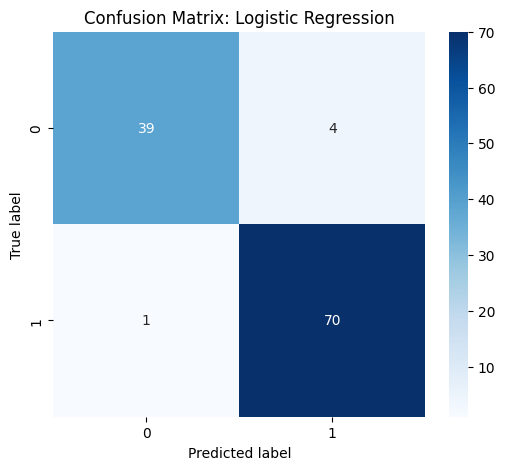

In [113]:
from sklearn.metrics import confusion_matrix

x,y = load_breast_cancer(return_X_y=True)
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42
)

model = LogisticRegression(solver="lbfgs", max_iter=5000, random_state=42)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

confusion_Matrix = confusion_matrix(y_test, y_pred, labels=model.classes_)

# Visualize with heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(
    confusion_Matrix, 
    annot=True, 
    fmt="d", 
    cmap="Blues", 
    xticklabels=model.classes_, 
    yticklabels=model.classes_
)
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title("Confusion Matrix: Logistic Regression")
plt.show()


### Q12

In [114]:

from sklearn.metrics import precision_score, recall_score, f1_score, classification_report

x,y = load_breast_cancer(return_X_y=True)

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42
)

model = LogisticRegression(solver="lbfgs", max_iter=5000, random_state=42)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Precision: {prec:.4f}")
print(f"Recall:    {rec:.4f}")
print(f"F1-Score:  {f1:.4f}\n")



Precision: 0.9459
Recall:    0.9859
F1-Score:  0.9655



### Q13

In [115]:
from sklearn.datasets import make_classification

x, y = make_classification(
    n_samples=5000,
    n_features=20,
    n_informative=2,
    n_redundant=10,
    n_clusters_per_class=1,
    weights=[0.90, 0.10],
    flip_y=0,
    random_state=23
)

unique, counts = np.unique(y, return_counts=True)
print(f"Original class distribution: {dict(zip(unique, counts))}\n")

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=34,stratify=y
)

model = LogisticRegression(solver="liblinear", max_iter=5000, random_state=49)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

print("Without class weights:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}\n")

model_weighted = LogisticRegression(solver="liblinear", max_iter=5000,class_weight='balanced', random_state=46)
model_weighted.fit(x_train,y_train)
y_pred = model_weighted.predict(x_test)

print("With class weights:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")


Original class distribution: {0: 4500, 1: 500}

Without class weights:
Accuracy: 0.9490

With class weights:
Accuracy: 0.8860


### Q14

In [116]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder


titanic = sns.load_dataset('titanic')

df = titanic[["survived", "pclass", "sex", "age", "sibsp", "parch", "fare", "embarked"]]
x=df.drop('survived',axis=1)
y = df['survived']
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=34,stratify=y
)
num_col = ["age", "sibsp", "parch", "fare", "pclass"]
cat_col = ["sex", "embarked"]

num_transformer= Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='median'))
])
cat_transformer = Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='most_frequent')),
    ('Encoder',OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(transformers=[
    ("numerical",num_transformer,num_col),
    ('categorical',cat_transformer,cat_col)
])
logistic = LogisticRegression(solver="lbfgs", max_iter=5000, random_state=42)
clf_pipeline = Pipeline(steps=[
    ('PreProcessor',preprocessor),
    ('Model',logistic)
])
clf_pipeline.fit(x_train,y_train)
y_pred = clf_pipeline.predict(x_test)
acc = accuracy_score(y_test, y_pred)
print(f"Logistic Regression on Titanic accuracy: {acc*100:.4f}%\n")

Logistic Regression on Titanic accuracy: 75.9777%



### Q15

In [117]:
data = load_breast_cancer()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 3. Model without scaling
model_noscale = LogisticRegression(solver="lbfgs", max_iter=5000, random_state=42)
model_noscale.fit(X_train, y_train)
y_pred_noscale = model_noscale.predict(X_test)
acc_noscale = accuracy_score(y_test, y_pred_noscale)

print(f"Accuracy without scaling: {acc_noscale:.4f}")

# 4. Model with StandardScaler
pipeline_scaled = Pipeline(steps=[
    ("scaler", StandardScaler()),
    ("classifier", LogisticRegression(solver="lbfgs", max_iter=5000, random_state=42))
])
pipeline_scaled.fit(X_train, y_train)
y_pred_scaled = pipeline_scaled.predict(X_test)
acc_scaled = accuracy_score(y_test, y_pred_scaled)

print(f"Accuracy with standardization: {acc_scaled:.4f}")


Accuracy without scaling: 0.9649
Accuracy with standardization: 0.9825


### Q16

ROC-AUC score: 0.9954


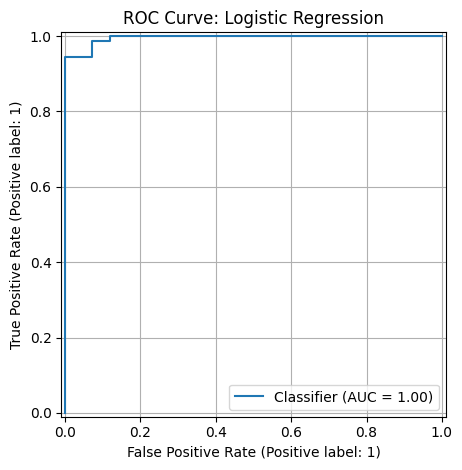

In [118]:
from sklearn.metrics import roc_auc_score, RocCurveDisplay

data = load_breast_cancer()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

model = LogisticRegression(solver="lbfgs", max_iter=5000, random_state=42)
model.fit(X_train, y_train)

y_proba = model.predict_proba(X_test)[:, 1]

# ROC AUC
roc_auc = roc_auc_score(y_test, y_proba)
print(f"ROC-AUC score: {roc_auc:.4f}")

# Plot ROC curve
RocCurveDisplay.from_predictions(y_test, y_proba)
plt.title("ROC Curve: Logistic Regression")
plt.grid(True)
plt.tight_layout()
plt.show()


### Q17

In [119]:
data = load_breast_cancer()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# C = 1/λ, so smaller C = stronger regularization)
model = LogisticRegression(C=0.5, solver="lbfgs", max_iter=5000, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy with C=0.5: {acc:.4f}")

Accuracy with C=0.5: 0.9649


### Q18

In [120]:
data = load_breast_cancer()
X, y = data.data, data.target
feature_names = data.feature_names


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

model = LogisticRegression(solver="lbfgs", max_iter=5000, random_state=42)
model.fit(X_train, y_train)

#coefficients and sort by absolute value
coefs = model.coef_.flatten()
coef_abs = np.abs(coefs)
idx_sorted = np.argsort(coef_abs)[::-1]

print("Top 10 features by absolute coefficient value:")
for i in idx_sorted[:10]:
    print(f"{feature_names[i]:30s}: coef={coefs[i]:+.4f}")

Top 10 features by absolute coefficient value:
worst concavity               : coef=-1.3202
texture error                 : coef=+1.0872
mean radius                   : coef=+0.8102
worst symmetry                : coef=-0.7847
worst compactness             : coef=-0.7582
worst concave points          : coef=-0.5545
mean concavity                : coef=-0.4544
worst texture                 : coef=-0.3752
worst smoothness              : coef=-0.3197
mean symmetry                 : coef=-0.3053


### Q19

In [121]:
from sklearn.metrics import cohen_kappa_score, accuracy_score

data = load_breast_cancer()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

model = LogisticRegression(solver="lbfgs", max_iter=5000, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

kappa = cohen_kappa_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.4f}")
print(f"Cohen's Kappa Score: {kappa:.4f}")

Accuracy: 0.9649
Cohen's Kappa Score: 0.9238


### Q20

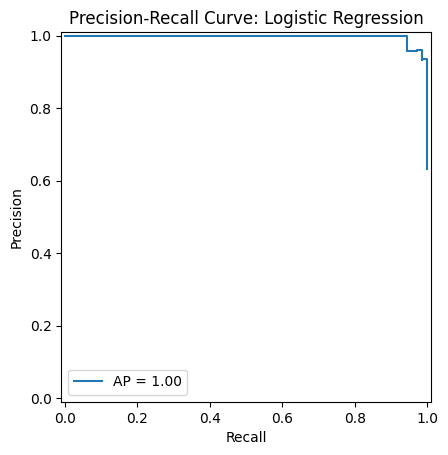

In [122]:
from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay, average_precision_score

data = load_breast_cancer()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

model = LogisticRegression(solver="lbfgs", max_iter=5000, random_state=42)
model.fit(X_train, y_train)

y_scores = model.predict_proba(X_test)[:, 1]

precision, recall, thresholds = precision_recall_curve(y_test, y_scores)
avg_prec = average_precision_score(y_test, y_scores)

# 6. Plot
display = PrecisionRecallDisplay(precision=precision, recall=recall, average_precision=avg_prec)
display.plot()
plt.title("Precision-Recall Curve: Logistic Regression")
plt.show()

### Q21

In [123]:
data = load_breast_cancer()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

solvers = ["liblinear", "saga", "lbfgs"]
results = {}

for solver in solvers:
    model = LogisticRegression(
        solver=solver,
        penalty="l2",
        max_iter=5000,
        random_state=42
    )
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[solver] = acc
    print(f"Solver: {solver:8s} → Accuracy: {acc:.4f}")


Solver: liblinear → Accuracy: 0.9649
Solver: saga     → Accuracy: 0.9474
Solver: lbfgs    → Accuracy: 0.9649


### Q22

In [124]:
from sklearn.metrics import matthews_corrcoef
model = LogisticRegression(solver="lbfgs", max_iter=5000, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Compute MCC 
mcc = matthews_corrcoef(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)

print(f"Accuracy: {acc:.4f}")
print(f"Matthews Correlation Coefficient: {mcc:.4f}\n")

Accuracy: 0.9649
Matthews Correlation Coefficient: 0.9245



### Q23

In [125]:
model_raw = LogisticRegression(solver="lbfgs", max_iter=5000, random_state=42)
model_raw.fit(X_train, y_train)
y_pred_raw = model_raw.predict(X_test)
acc_raw = accuracy_score(y_test, y_pred_raw)

# Scaling with standardization
pipeline_scaled = Pipeline(steps=[
    ("scaler", StandardScaler()),
    ("classifier", LogisticRegression(solver="lbfgs", max_iter=5000, random_state=42))
])
pipeline_scaled.fit(X_train, y_train) # standardisation
y_pred_scaled = pipeline_scaled.predict(X_test)
acc_scaled = accuracy_score(y_test, y_pred_scaled)

print(f"Accuracy on raw data:          {acc_raw:.4f}")
print(f"Accuracy on standardized data: {acc_scaled:.4f}")

Accuracy on raw data:          0.9649
Accuracy on standardized data: 0.9825


### Q24

In [126]:
param_grid = {"C": np.logspace(-3, 3, 20)}

base = LogisticRegression(solver="saga", max_iter=5000, random_state=42)

grid_search = GridSearchCV(
    estimator=base,
    param_grid=param_grid,
    scoring="accuracy",
    cv=5,
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)

best_C = grid_search.best_params_["C"]
best_cv_score = grid_search.best_score_
print(f"Optimal C (from CV): {best_C:.4f}")
print(f"Best cross-validated accuracy: {best_cv_score:.4f}")

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Optimal C (from CV): 0.0021
Best cross-validated accuracy: 0.9187


### Q25

In [ ]:
import joblib 

model = LogisticRegression(solver="lbfgs", max_iter=5000, random_state=42)
model.fit(X_train, y_train)

filename = "logisticModelJoblib.pkl"
joblib.dump(model, filename)
print(f"Model saved to {filename}")

loaded_model = joblib.load(filename)
print("Model loaded from disk.")

y_pred = loaded_model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy of loaded model: {acc:.4f}")

Model saved to logisticModelJoblib.pkl
Model loaded from disk.
Accuracy of loaded model: 0.9649
